In [24]:
import networkx as nx


def compute_degree_centrality(graph, normalized=True):
    """
    Computes the degree centrality for each node in the given graph.

    Parameters:
    graph (networkx.Graph): The input graph.

    Returns:
    dict: A dictionary with nodes as keys and their degree centrality as values.
    """
    node_degree_centrality = {}
    for node in graph.nodes():
        # Normalize by dividing by (N-1) where N is the number of nodes in the graph
        degree_centrality = graph.degree(node)
        if normalized:
            node_degree_centrality[node] = degree_centrality / (len(graph.nodes()) - 1)
        else:
            node_degree_centrality[node] = degree_centrality
    return node_degree_centrality

def compute_betweenness_centrality(graph, normalized=True):
    """
    Computes the betweenness centrality for each node in the given graph.
    
    Parameters:
    graph (networkx.Graph): The input graph.
    normalized (bool): If True, normalize by dividing by (n-1)(n-2)/2.
    
    Returns:
    dict: A dictionary with nodes as keys and their betweenness centrality as values.
    """
    node_betweenness_centrality = {}
    for node in graph.nodes():
        node_betweenness_centrality[node] = 0
    
    # Precompute all pairs shortest paths
    all_shortest_paths = dict(nx.all_pairs_shortest_path(graph))
    
    # Count how many times each node appears on shortest paths between other nodes
    for source_node in graph.nodes():
        for target_node in graph.nodes():
            if source_node != target_node:
                try:
                    # Get the shortest path from source to target
                    shortest_path = all_shortest_paths[source_node][target_node]
                    # Count intermediate nodes (exclude source and target)
                    for intermediate_node in shortest_path[1:-1]:
                        node_betweenness_centrality[intermediate_node] += 1
                except KeyError:
                    # No path exists between source and target
                    pass
    
    # Normalize the betweenness centrality values
    if normalized:
        n = len(graph.nodes())
        if n > 2:
            scale = 1.0 / ((n - 1) * (n - 2))
            for node in node_betweenness_centrality:
                node_betweenness_centrality[node] *= scale
    
    return node_betweenness_centrality

def compute_closeness_centrality(graph, normalized=True):
    """
    computes the closeness centrality for each node in the given graph.
    Parameters:
    graph (networkx.Graph): The input graph.

    Returns: A dictionary with nodes as keys and their closeness centrality as values.

    """
    node_closeness_centrality = {}
    for node in graph.nodes():
        path_length_sum = 0
        for target_node in graph.nodes():
            if node != target_node:
                try:
                    path_length = nx.shortest_path_length(graph, source=node, target=target_node)
                    path_length_sum += path_length
                except nx.NetworkXNoPath:
                    # If there is no path, we can consider the distance as infinite
                    path_length_sum += float('inf')
            if path_length_sum > 0 and path_length_sum != float('inf'):
                if normalized:
                    closeness_centrality = (len(graph.nodes()) - 1) / path_length_sum
                else:
                    closeness_centrality = 1 / path_length_sum
                node_closeness_centrality[node] = closeness_centrality
    return node_closeness_centrality


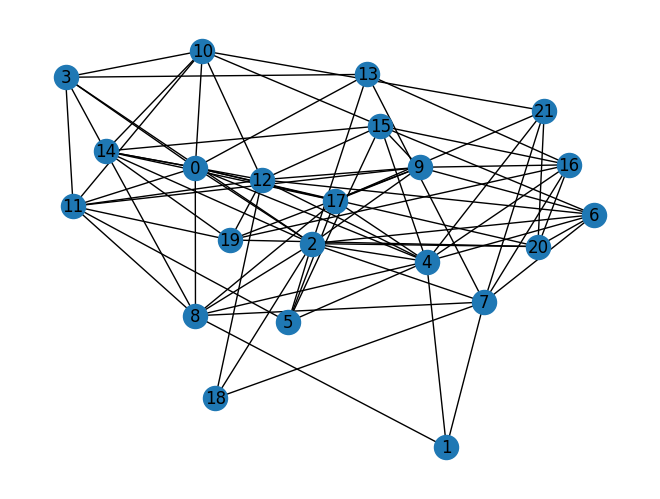

In [16]:
# Erdos-Renyi graph Gnp graph with n=22 and p=0.3
n = 22
p = 0.3
G = nx.erdos_renyi_graph(n, p, seed=42)
nx.draw(G, with_labels=True)

In [29]:
# Return top 3 nodes for each centrality measure
degree_centrality = compute_degree_centrality(G)
betweenness_centrality = compute_betweenness_centrality(G)
closeness_centrality = compute_closeness_centrality(G)
top_3_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_betweenness = sorted(betweenness_centrality.items(),key=lambda x: x[1], reverse=True)[:3]
top_3_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 nodes by Degree Centrality:", top_3_degree)
print("Top 3 nodes by Betweenness Centrality:", top_3_betweenness)
print("Top 3 nodes by Closeness Centrality:", top_3_closeness)

Top 3 nodes by Degree Centrality: [(2, 0.5714285714285714), (4, 0.5238095238095238), (0, 0.47619047619047616)]
Top 3 nodes by Betweenness Centrality: [(4, 0.18809523809523812), (2, 0.18095238095238098), (0, 0.1523809523809524)]
Top 3 nodes by Closeness Centrality: [(2, 0.7), (4, 0.6774193548387096), (0, 0.65625)]
